In [1]:
# project: p1
# submitter: ejhickey3
# partner: none
# hours: 15

In [2]:
import json
import pandas as pd
import os
import csv
from subprocess import check_output
import subprocess
import time
import numpy as np

In [3]:
#Q1: what is the type of 7/2?

type(7/2)


float

In [4]:
#Q2: what is error?

x = 4
maximum = 10
minimum = 5
error = x<=minimum or x>=maximum# True if x is outside the minimum-to-maximum range
error


True

In [5]:
#Q3: ignoring case, does word end with the suffix "esque"?

word = "KAFKAESQUE"
suffix_match = word[-5:].lower() == "esque" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match



True

In [6]:
def add(x, y=1):
    return x + y 

In [7]:
#Q4: what is add(3, 4)?

add(3,4)

7

In [8]:
#Q5: what is add(9)?

add(9)

10

In [9]:
#Q6: what is status?

x = 4
if x < 0: 
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [10]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [11]:
def smart_count(numbers):
    final_sum = 0
    for num in numbers:
        
        if type(num) == int:
            if num < 0:
                break
            if num >= 0:
                if num <= 10:
                    final_sum = final_sum + num              
    return final_sum

In [12]:
#Q7: what is smart_count(nums)?

smart_count(nums)

14

In [13]:
#Q8: what is smart_count([2, 1, 11, 3, 15, -1, 8, 2])

smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

coord3["z"] = 3.14

In [15]:
#Q9: after inserting a "z" key in coord3 (with coord3["z"] = 3.14), what is rows?

rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#Q10: what is the value associated with the "x" key of the dict in the last position of the first list?

rows[0][-1]["x"]

8

In [17]:
#Q11: what is rows after running the following?

import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change

rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [18]:
def column_values(table):
    header = ["A", "B", "C"]
    column_vals = []
    for row in table:
        column_vals.append(row[header.index("B")])
    return column_vals

In [19]:
def add_vals(numbers):
    final_sum = 0
    for num in numbers:
        
        if type(num) == int:
            final_sum = final_sum + num              
    return final_sum

In [20]:
#Q12: if we imagine the list of lists structure referenced by rows as a table, with column names in header,
#what is the sum of values in the "B" column?

add_vals(column_values(rows))

10007

In [21]:
def get_column_b(row):
    return row[header.index("B")]

rows.sort(key=get_column_b)

In [22]:
#Q13: what is rows after we sort it in-place by the "B" column, ascending?
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [23]:
f = open("usd.json")
data = f.read()
f.close()

In [24]:
print(type(data))
print(data[:300] + "...")

<class 'str'>
{"eur":{"code":"EUR","alphaCode":"EUR","numericCode":"978","name":"Euro","rate":0.98535489535028,"date":"Tue, 13 Sep 2022 11:55:01 GMT","inverseRate":1.0148627714936},"gbp":{"code":"GBP","alphaCode":"GBP","numericCode":"826","name":"U.K. Pound Sterling","rate":0.85438980693642,"date":"Tue, 13 Sep 20...


In [25]:
f = open("usd.json")
conversions = json.load(f)
f.close()

In [26]:
#Q14: say you're going on vacation to Europe with 400 US dollars; how many Euros can you get at the current exchange rate?

conversions["eur"]["rate"] * 400

394.14195814011197

In [27]:
def divide(numerator, denominator):
    if denominator == 0:
        return float("nan")
    else:
        return numerator / denominator

In [28]:
#Q15: what is divide(3, 2)?

divide(3,2)

1.5

In [29]:
#Q16: what is divide(-3, 0)?

divide(-3,0)

nan

In [30]:
years = {}

for i in os.listdir("home-computers"):
    if i[-4:] == ".csv":
        df = (pd.read_csv(os.path.join("home-computers", i), skiprows=1)).set_index("Geographic Area Name")
        years[int(i[7:11])] = df


In [31]:
#Q17 what are the keys in years?

keys = list(years.keys())
keys.sort()
keys

[2013, 2014, 2015, 2016, 2017, 2018]

In [32]:
#Q18: how many households did Wisconsin have in 2018?

df_2 = years[2018]
df_2.loc["Wisconsin", "Estimate!!Total"]

2371960

In [33]:
#Q19: how many total households in the US are estimated to not have any computer at home? (2018)

total_s = df_2["Estimate!!Total!!No Computer"].sum()
total_s

10285814

In [34]:
#Q20: what is the biggest per-state margin of error for "No Computer", as a fraction of the total estimate? (2018)

no_comp = df_2["Estimate!!Total!!No Computer"]
no_comp_err = df_2["Margin of Error!!Total!!No Computer"]

err_ratio = no_comp_err / no_comp
    
err_ratio.max()

0.12375641594322287

In [35]:
#Q21: for Wisconsin and adjacent states, what percent of households are estimated to be without a computer? (2018)
#States: Illinois, Indiana, Iowa, Michigan, Minnesota, Wisconsin.

mws_wo_comp = {}
mws = [ "Illinois" , "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
for state in mws:
    est_no_comp = df_2.loc[state, "Estimate!!Total!!No Computer"]
    est_total = df_2.loc[state, "Estimate!!Total"]
    mws_wo_comp[state] = (df_2.loc[state, "Estimate!!Total!!No Computer"] / df_2.loc[state, "Estimate!!Total"])*100
mws_wo_comp

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% Households w/o Computer'>

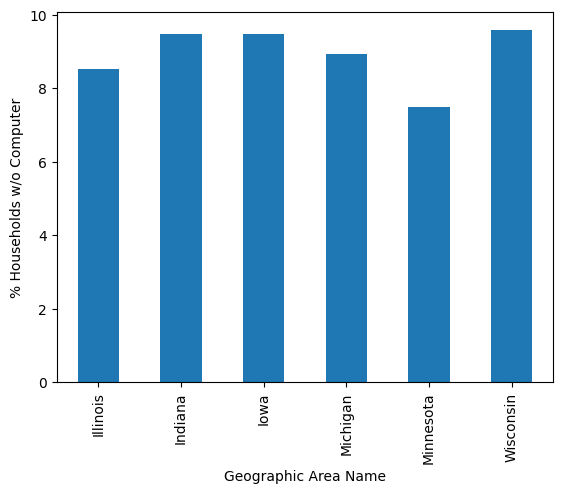

In [36]:
#Q22: same question, but answer with a bar plot.

ax = ((df_2["Estimate!!Total!!No Computer"][mws] / df_2[ "Estimate!!Total"][mws])*100).plot.bar()
ax.set_ylabel("% Households w/o Computer")
ax

Text(0.5, 0, 'Year')

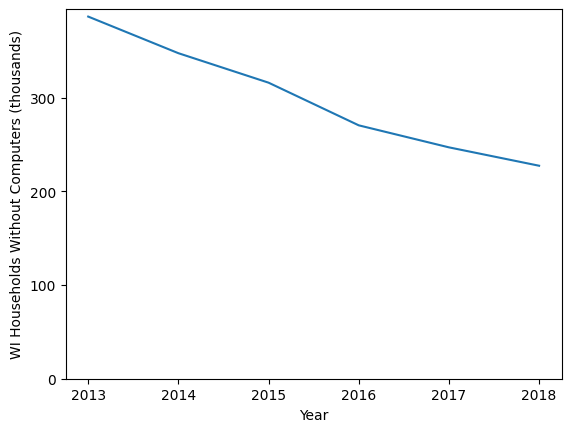

In [37]:
#Q23: how as the number of WI households without computers changed over recent years?

df_2013 = years[2013]
df_2014 = years[2014]
df_2015 = years[2015]
df_2016 = years[2016]
df_2017 = years[2017]
df_2018 = years[2018]

dfs = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]

value_by_year = []
for idf in dfs:
        value_by_year.append(idf["Estimate!!Total!!No Computer"]["Wisconsin"])
        
value_year = {}
for i in range(len(keys)):
        value_year[keys[i]] = value_by_year[i] / 1000
        
year_val = pd.Series(value_year)
comp_ax = year_val.plot.line()
comp_ax.set(yticks= [0,100,200,300])
comp_ax.set_ylabel("WI Households Without Computers (thousands)")
comp_ax.set_xlabel("Year")

[[<matplotlib.axis.XTick at 0x7faa9dfbdff0>,

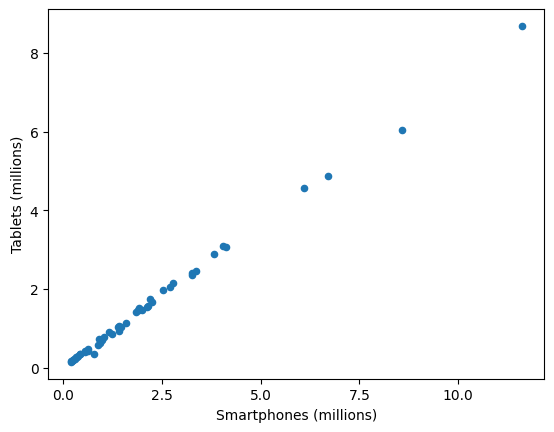

In [38]:
#Q24: what is the relationship between household with smartphones and those with tablets? (2018)
#"Estimate!!Total!!Has one or more types of computing devices!!Smartphone"
#"Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"

plot = df_2018[["Estimate!!Total!!Has one or more types of computing devices!!Smartphone","Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]] / 1000000
phone_tablet = plot.plot.scatter(x = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone", y = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer" )
phone_tablet.set_xlabel("Smartphones (millions)")
phone_tablet.set_ylabel("Tablets (millions)")
phone_tablet.set(xticks= [0.0, 2.5,5.0,7.5, 10.0])

In [39]:
#Q25: what is the first line of output from git log when run in the flask repo directory?
check_output(["git", "checkout", "main"], cwd="flask")
output = check_output(["git", "log"], cwd="flask", encoding="utf-8" ).split('\n')
output[0]

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [40]:
#Q26: What are the commit numbers of the 50 earliest commits?

commit_nums = []
for string in output:
    if string[0:6] == "commit":
        commit_nums.append(string[7:])

commit_nums[-50:]

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [41]:
#Q27: what did the README file contain after the 3rd commit?

check_output(["git", "checkout", commit_nums[-3]], cwd= "flask")
f= open("flask/README", encoding="utf-8")
data = f.read()
f.close()

data

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [42]:
#Q28: how many pull requests were merged from each GitHub user? Only output users who appear 5 or more times.

user_pulls = {}
useful_strs = []
for string in output:
    if string.find("Merge pull request") != -1:
        if string.find("/")!= -1:
            listed_string = string.split(" ")
            useful_strs.append(listed_string[-1][0:listed_string[-1].index("/")])

for name in useful_strs:
    if name not in user_pulls:
        user_pulls[name] = 0
    if name in user_pulls:
        user_pulls[name] += 1      
        
irr_users = []
for user in user_pulls:
    if user_pulls[user] < 5:
        irr_users.append(user)

for user in irr_users:
    del user_pulls[user]
    
user_pulls

{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'jeffwidman': 8,
 'garenchan': 8,
 'davidism': 45,
 'dawran6': 7,
 'untitaker': 20,
 'lord63-forks': 5,
 'methane': 5,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [43]:
#Q29: what is the output of pip3 instal? (yes, the mispelling was intentional)
try:
    msg = check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output

str_output = str(msg, encoding="utf-8")
str_output

'ERROR: unknown command "instal" - maybe you meant "install"\n'

[[<matplotlib.axis.YTick at 0x7faa9dc61480>,

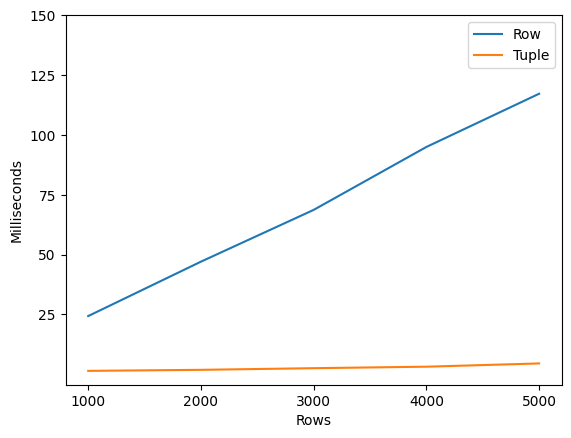

In [44]:
#Q30: what is faster for looping over a DataFrame, iterrows or itertuples?

def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

amount_rows = [1000, 2000, 3000, 4000,5000]
row_times = {}
tuple_times = {}
for val in amount_rows:
    r_df = rand_df(val)
    t0 = time.time()
    for row in r_df.iterrows():
        pass
    t1 = time.time()
    row_time = t1-t0 
    row_times[val] = row_time*1000
    t2 = time.time()
    for row in r_df.itertuples():
        pass
    t3 = time.time()
    tuple_time = t3-t2
    tuple_times[val] = tuple_time*1000
    
srs_tuple = pd.Series(tuple_times)
srs_row = pd.Series(row_times)
df_tuple = pd.DataFrame(srs_tuple, columns = ["Tuple"])
df_row = pd.DataFrame(srs_row, columns = ["Row"])

combined = pd.concat([df_row, df_tuple], axis=1, join='inner')
result = combined.plot.line()
result.set_xlabel("Rows")
result.set_ylabel("Milliseconds")
result.set(xticks= [1000,2000,3000,4000,5000])
result.set(yticks= [25,50,75,100,125,150])

[[<matplotlib.axis.YTick at 0x7faa9db6a530>,

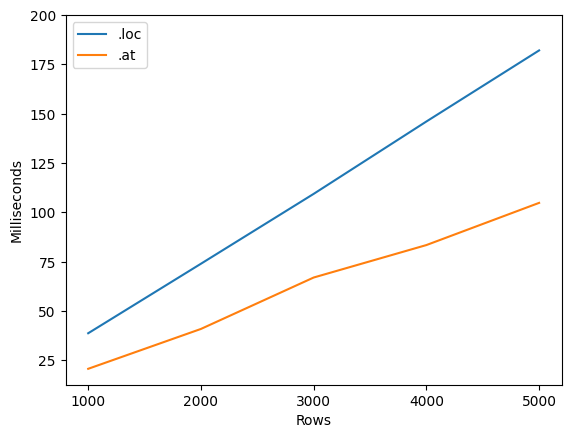

In [45]:
#Q31: what is faster, loc, or at?

amount_rows = [1000, 2000, 3000, 4000,5000]
loc_times = {}
at_times = {}
for val in amount_rows:
    n_df = rand_df(val)
    t0 = time.time()
    total_loc = 0
    for idx in n_df.index:
        for col in n_df.columns:
            total_loc += n_df.loc[idx, col]     
    t1 = time.time()
    loc_time = t1-t0 
    loc_times[val] = loc_time*1000
    t2 = time.time()
    total_at = 0
    for idx in n_df.index:
        for col in n_df.columns:
            total_at += n_df.at[idx, col] 
    t3 = time.time()
    at_time = t3-t2
    at_times[val] = at_time*1000
    
srs_loc = pd.Series(loc_times)
srs_at = pd.Series(at_times)
df_loc = pd.DataFrame(srs_loc, columns = [".loc"])
df_at = pd.DataFrame(srs_at, columns = [".at"])

combined_locat = pd.concat([df_loc, df_at], axis=1, join='inner')
result_locat = combined_locat.plot.line()
result_locat.set_xlabel("Rows")
result_locat.set_ylabel("Milliseconds")
result_locat.set(xticks= [1000,2000,3000,4000,5000])
result_locat.set(yticks= [25,50,75,100,125,150,175,200])

Text(0, 0.5, 'Milliseconds')

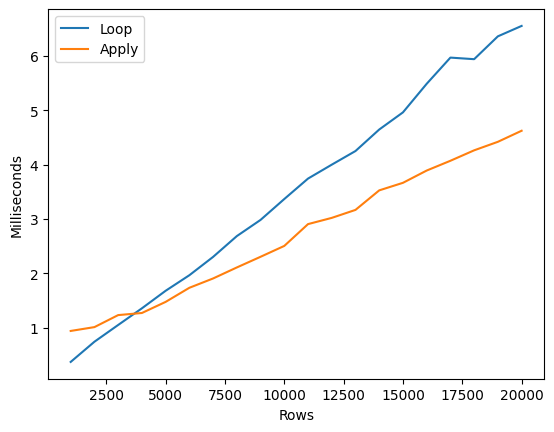

In [46]:
#Q32: what is faster, a loop or .apply?

def laugh(x):
    return "ha" * x


amount_rows = [1000, 2000, 3000, 4000,5000, 6000, 7000, 8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]
apply_times = {}
loop_times = {}
for val in amount_rows:
    l_df = rand_df(val)
    t0 = time.time()
    result_apply = l_df["A"].apply(laugh).tolist()
    t1 = time.time()
    apply_time = t1-t0 
    apply_times[val] = apply_time*1000
    t2 = time.time()
    result_loop = []
    for num in l_df["A"]:
        result_loop.append(laugh(num))
    t3 = time.time()
    loop_time = t3-t2
    loop_times[val] = loop_time*1000
    
srs_loop = pd.Series(loop_times)
srs_apply = pd.Series(apply_times)
df_loop = pd.DataFrame(srs_loop, columns = ["Loop"])
df_apply = pd.DataFrame(srs_apply, columns = ["Apply"])

combined_loopply = pd.concat([df_loop, df_apply], axis=1, join='inner')
result_loopply = combined_loopply.plot.line()
result_loopply.set_xlabel("Rows")
result_loopply.set_ylabel("Milliseconds")